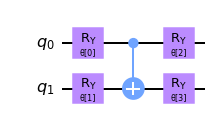

In [36]:
from qiskit.circuit.library import RealAmplitudes

# use the parametrized circuit Real amplitudes from qiskit library
ansatz = RealAmplitudes(num_qubits = 2, reps = 1, entanglement = 'linear').decompose()

ansatz.draw()

In [37]:
# after that we need to define a Hamiltonian, we will use H = ZxZ
from qiskit.opflow import Z, I

hamiltonian = Z ^ Z

In [38]:
# we need to compute the expectation value of the quantum state
from qiskit.opflow import StateFn, PauliExpectation

expectation = StateFn(hamiltonian, is_measurement = True) @ StateFn(ansatz)
pauli_basis = PauliExpectation().convert(expectation)

In [39]:
# next we simulate the measurement of the expectation value
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.opflow import CircuitSampler

QuantumInstance = QuantumInstance(Aer.get_backend('qasm_simulator'), shots = 8192, seed_simulator = 2717, seed_transpiler = 2718)

sampler = CircuitSampler(QuantumInstance)

def evaluate_expectation(x):
    value_dict = dict(zip(ansatz.parameters, x))
    result = sampler.convert(pauli_basis, params = value_dict).eval()
    return np.real(result)

In [40]:
import numpy as np

point = np.random.random(ansatz.num_parameters)
index = 2

In [41]:
eps = 0.2

e_i = np.identity(point.size)[:, index]

plus = point + eps * e_i
minus = point - eps * e_i

finite_difference = evaluate_expectation(plus) - evaluate_expectation(minus) / (2 * eps)

print(finite_difference)

-0.5217285156250003


In [43]:
# we can use qiskit's Gradient class for gradianet descent method
from qiskit.opflow import Gradient

shifter = Gradient('fin_diff', analytic = False, epsilon = eps)
grad = shifter.convert(expectation, params = ansatz.parameters[index])
print(grad)

value_dict = dict(zip(ansatz.parameters, point))
sampler.convert(grad, value_dict).eval().real

SummedOp([
  2.5 * ComposedOp([
    OperatorMeasurement(ZZ),
    CircuitStateFn(
         ┌──────────┐     ┌────────────────┐
    q_0: ┤ Ry(θ[0]) ├──■──┤ Ry(θ[2] + 0.2) ├
         ├──────────┤┌─┴─┐└──┬──────────┬──┘
    q_1: ┤ Ry(θ[1]) ├┤ X ├───┤ Ry(θ[3]) ├───
         └──────────┘└───┘   └──────────┘   
    )
  ]),
  -2.5 * ComposedOp([
    OperatorMeasurement(ZZ),
    CircuitStateFn(
         ┌──────────┐     ┌────────────────┐
    q_0: ┤ Ry(θ[0]) ├──■──┤ Ry(θ[2] - 0.2) ├
         ├──────────┤┌─┴─┐└──┬──────────┬──┘
    q_1: ┤ Ry(θ[1]) ├┤ X ├───┤ Ry(θ[3]) ├───
         └──────────┘└───┘   └──────────┘   
    )
  ])
])


0.46508789062499956